## Análise de Dados dos Crimes Contra a Mulher em Belém

### 1. Seleção e tratamento de dados

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [25]:
df = pd.read_csv(r"C:\\Users\\carlo\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

In [26]:
df_2023 = pd.read_excel("C:\\Users\\carlo\\Downloads\\BASE 2023 - DEAM.xlsx")

In [27]:
df.shape

(1842040, 81)

In [28]:
df.ano_fato.value_counts()

ano_fato
2021    475486
2019    471446
2022    465571
2020    421113
2018      8408
2016         4
2013         3
2012         2
2015         2
2011         2
2017         2
2010         1
Name: count, dtype: int64

In [31]:
df_2023.shape

(499999, 71)

In [32]:
df_2023.ano_fato.value_counts()

ano_fato
2023    499999
Name: count, dtype: int64

In [33]:
df.drop(df[df['ano_fato'].isin([2010, 2017, 2011,2015,2012,2013,2016,2018])].index, inplace=True)

In [34]:
df.data_fato.min()

'2019-01-01'

In [35]:
df.data_fato.max()

'2022-12-31 00:00:00'

In [36]:
df_2023.data_fato.min()

Timestamp('2023-01-01 00:00:00')

In [37]:
df_2023.data_fato.max()

Timestamp('2023-12-31 00:00:00')

Concatenação das bases

In [38]:
df_concatenado = pd.concat([df, df_2023], ignore_index=True)

In [39]:
df_concatenado.shape

(2333615, 81)

In [40]:
pd.set_option('display.max_columns', None)
df_concatenado.head()

,nro_bop,nro_bop_aditado,nro_tombo,tipo_tombo,unidade_origem,unidade_responsavel,data_registro,hora_registro,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,data_inst_proc,data_concl_proc,sit_proc,classe_motivo,mes_registro,mes_fato,ano_registro,ano_fato,registros,consolidado,fato_real,especificacao_crime,meio_emp_deac,latitude,longitude,causa_presumivel,especializacao_fato,grupo_ocorrencia,sub_grupo,meio_empregado_sisp,distrito,municipios,regionais,bairros,reg_integracao,risp,aisp,rua_fato,empresa,linha,tipo_transporte,complemento,local_ocorrencia,identificacao_fato,relato,vit_dt_nasc,vit_idade,vit_fx_etaria,vit_nro_doc,vit_tipo_doc,vit_pai,vit_mae,vit_tipo,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_data_nasc,aut_idade,aut_fx_etaria,aut_tipo,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil,meio_locomocao,cor_veiculo,marca_veic_fuga,modelo_do_veic_fuga,qtd_autor,relatorio,ident_autoria,atuacao
0,277/2019.255548-2,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,SAO FELIX DO XINGU - UNIDADE POLICIAL 212,2019-12-12,1970-01-01 14:43:00,2019-12-11,QUA,1970-01-01 15:30:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,SAO FELIX DO XINGU,SAO FELIX DO XINGU,ALTO XINGU,ZONA RURAL,REGIAO ARAGUAIA,14ª RISP,NaN,RUA PRINCIPAL,NaN,NaN,NaN,NaN,ESTABELECIMENTO BANCARIO,FURTO IP: 177.23.224.122,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1943-06-24 00:00:00,76.0,IDOSO (65 ANOS OU MAIS),18637744834,CPF,ANTONIO ALVES DA SILVA,MARIA MARTINS DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277/2019.257206-7,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-16,1970-01-01 10:38:00,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,BELEM,BELEM,CAPITAL,MANGUEIRAO,REGIAO GUAJARA,01ª RISP,10ª AISP,CONJ. CATALINA,NaN,NaN,NaN,NaN,VIA PUBLICA,FURTO IP: 189.40.106.250,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1969-11-14 00:00:00,50.0,ADULTO IV (35 A 64 ANOS),NaN,NaN,NaN,MARIA DAS GRA?AS ARAUJO SANTOS,NaN,F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,277/2019.161968-6,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,TUCURUI - PESSOA 454,2019-08-10,1970-01-01 10:55:00,2019-08-06,TER,1970-01-01 13:30:00,12 |-- 18,12 |-- 14,1900-09-09,1900-09-09,NAO INSTAURADO,REGISTROS QUE NAO GERAM PROCEDIMENTO,AGOSTO,AGOSTO,2019,2019,DANO CULPOSO (CIVIL),DANO NO TRANSITO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,DELITO DE TRANSITO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,TUCURUI,TUCURUI,LAGO DE TUCURUI,CENTRO,REGIAO LAGO TUCURUI,09ª RISP,NaN,"PRINCIPAL, RUA",NaN,NaN,NaN,NaN,OUTROS,ACIDENTE DE TRANSITO IP: 131.255.227.254,"EXCLUSIVAMENTE PARA FINS DE DIREITO, O RELATOR...",1986-04-17 00:00:00,33.0,ADULTO III (30 A 34 ANOS),03981094984,CNH,NaN,RAIMUNDA OLIVEIRA DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277/2019.162974-0,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-12,1970-01-01 13:00:00,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,1900-09-09,1900-09-09,NAO IN

A coluna "data_fato" será padronizada para o formato de data

In [41]:
df_concatenado["data_fato"] = pd.to_datetime(df_concatenado["data_fato"],format='mixed')

In [43]:
df_concatenado.data_fato.min()

Timestamp('2019-01-01 00:00:00')

In [44]:
df_concatenado.data_fato.max()

Timestamp('2023-12-31 00:00:00')

#### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'municipios'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'mes_fato'
    - 'ano_fato'
    - 'data_fato'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'grau_de_relacionamento'
    - 'relato'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'
 - Dados das vitimas:
   - 'aut_sexo'



In [45]:
crimes_df=df_concatenado[['unidade_origem','unidade_responsavel','dia_semana','fx_4_hor','mes_fato', 'municipios',
                    'ano_fato','data_fato','consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','bairros','local_ocorrencia','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                    'grau_de_relacionamento', 'relato', 'aut_sexo']]

In [46]:
crimes_df.shape

(2333615, 22)

##### Filtros para crimes contra a mulher que ocorreram somente na capital Belém
* Para delimitar o escopo da análise, serão consideradas apenas as ocorrências registradas na cidade de Belém e os crimes que se enquadram em crimes contra a mulher

In [47]:
crimes_df = crimes_df[crimes_df['municipios'] == 'BELEM']
crimes_df.reset_index(drop=True, inplace=True)
crimes_df.drop(columns=['municipios'], inplace=True)

#### Definição de crimes contra a mulher

Um crime contra a mulher é caracterizado quando uma mulher é vítima de violência ou discriminação com base em seu gênero. Isso pode incluir uma ampla gama de comportamentos prejudiciais, que vão desde violência física e sexual até formas mais sutis de discriminação, como o assédio moral ou sexual no ambiente de trabalho.

- Tipos de Violência
    - Violência física (visual)
    - Violência psicológica (não-visual, mas muito extensa)
    - Violência sexual (visual)
    - Violência patrimonial (visual-material)
    - Violência moral (não-visual)

In [49]:
crimes_consolidados_belem = crimes_df["consolidado"].unique()
print("Valores unicos em consolidado:", len(crimes_consolidados_belem))
crimes_consolidados_belem

Valores unicos em consolidado: 806


array(['FURTO', 'TRAFICO DE DROGAS', 'DESACATO',
       'CONDUZIR VEICULO SOB INFLUENCIA DE ALCOOL', 'ROUBO', 'JA LANCADO',
       'PARA FINS DE DIREITO', 'LESAO CORPORAL', 'DANO NO TRANSITO',
       'COMUNICACAO DE OBITO', 'OUTROS FATOS ATIPICOS',
       'APRESENTACAO - MANDADO DE PRISAO', 'CONFLITOS VICINAIS', 'AMEACA',
       'DISPOSICOES GERAIS', 'DANO', 'HOMICIDIO', 'DANO CIVIL',
       'RECUPERACAO DE VEICULOS', 'INJURIA',
       'PERTURBACAO DO SOSSEGO ALHEIOS', 'CONFLITOS FAMILIARES',
       'ACIDENTE DE TRANSITO SEM VITIMA', 'ESTELIONATO',
       'FALSIDADE IDEOLOGICA', 'CONSUMO PESSOAL DE DROGAS',
       'POLUICAO SONORA', 'LESAO NO TRANSITO', 'FRAUDE A EXECUCAO',
       'DISPOSICAO DE COISAS ALHEIAS COMO PROPRIAS',
       'ESTUPRO DE VULNERAVEL', 'TRANSACOES BANCARIAS',
       'ROUBO DE VEICULO', 'APRESENTACAO - PRESO FORAGIDO',
       'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS', 'ACIDENTE FORTUITO',
       'INVASAO DE DISPOSITIVO INFORMATICO', 'VIOLACAO DE DOMICILIO',
       'EX

In [50]:
crimes_df.consolidado.value_counts()

consolidado
FURTO                                                        142957
ROUBO                                                        127135
AMEACA                                                        47912
ESTELIONATO                                                   43348
DANO NO TRANSITO                                              41163
                                                              ...  
ABUSAR DO PODER ECONOMICO                                         1
DANOS MATERIAIS PESSOAIS                                          1
COAGIR O IDOSO                                                    1
ADQUIRIR, DISTRIBUIR OU REVENDER COMBUSTIVEL EM DESACORDO         1
ABANDONO MATERIAL - FRUSTACAO DE PAGAMENTO                        1
Name: count, Length: 805, dtype: int64

Para conseguir um resultado mais direcionado, na culuna consolidado serão selecionados apenas crimes que se enquadram como crimes contra a mulher

In [68]:
crimes_df.shape

(700104, 21)

In [69]:
crimes_df = crimes_df[crimes_df['consolidado'].isin(['AMEACA', 'LESAO CORPORAL', 'LESAO CORPORAL CULPOSA', 'LESAO CORPORAL SEGUIDA DE MORTE', 'TENTATIVA DE LESAO CORPORAL', 'LESAO CORPORAL DOLOSA', 'HOMICIDIO',  'HOMICIDIO CULPOSO','ESTUPRO DE VULNERAVEL', 'SUSPEITO DE ESTUPRO DE VULNERAVEL','TENTATIVA DE ESTUPRO DE VULNERAVEL', 'ESTUPRO DE VULNERAVEL COM RESULTADO MORTE', 'SUSPEITA DE ESTUPRO DE VULNERAVEL','DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',  'DESCUMPRIMENTO DE MEDIDA PROTETIVA', 'MEDIDAS PROTETIVAS', 'TENTATIVA DE HOMICIDIO', 'ASSEDIO SEXUAL','ASSEDIO', 'ASSEDIO SEXUAL POR SUPERIOR HIERARQUICO OU ASCENDENTE',  'IMPORTUNACAO SEXUAL', 'IMPORTUNACAO OFENSIVA AO PUDOR', 'VIOLENCIA PSICOLOGICA', 'VIOLENCIA PSICOLOGICA, QUALQUER CONDUTA QUE LHE CAUSE DANO EMOCIONAL, DIMINUICAO DA AUTO-ESTIMA, LHE PREJUDIQUE E PERTURBE O PLENO DESENVOLVIMENTO, VISE DEGRADAR OU CONTROLAR SUAS ACOES, COMPORTAMENTOS, CRENCAS E DECISOES, MEDIANTE AMEACA, CONSTRANGIMENTO', 'VIOLENCIA MORAL, QUALQUER CONDUTA QUE CONFIGURE CALUNIA, DIFAMACAO OU INJURIA', 'VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLACAO SEXUAL', 'VIOLENCIA FISICA, QUALQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL', 'ESTUPRO COM RESULTADO MORTE', 'ESTUPRO' 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA DEFERIDA JUDICIALMENTE', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA', 'A VIOLENCIA PATRIMONIAL, ENTENDIDA COMO QUALQUER CONDUTA QUE CONFIGURE RETENCAO, SUBTRACAO, DESTRUICAO PARCIAL OU TOTAL DE SEUS OBJETOS, INSTRUMENTOS DE TRABALHO, DOCUMENTOS PESSOAIS, BENS, VALORES E DIREITOS OU RECURSOS ECONOMICOS, INCLUINDO OS DEST', 'VIOLENCIA PATRIMONIAL', 'VIOLENCIA SEXUAL, QUALQUER CONDUTA QUE A CONSTRANJA A PRESENCIAR, A MANTER OU A PARTICIPAR DE RELACAO SEXUAL NAO DESEJADA, MEDIANTE INTIMIDACAO, AMEACA, COACAO OU USO DA FORCA, INDUZA A COMERCIALIZAR OU A UTILIZAR, DE QUALQUER MODO, A SUA SEXUALIDADE, IMP'])]
crimes_df.reset_index(drop=True, inplace=True)

In [70]:
crimes_df.shape

(80335, 21)

Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [71]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80335 entries, 0 to 80334
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   unidade_origem          31138 non-null  object        
 1   unidade_responsavel     31138 non-null  object        
 2   dia_semana              80335 non-null  object        
 3   fx_4_hor                80335 non-null  object        
 4   mes_fato                80335 non-null  object        
 5   ano_fato                80335 non-null  int64         
 6   data_fato               80335 non-null  datetime64[ns]
 7   consolidado             80335 non-null  object        
 8   especificacao_crime     23533 non-null  object        
 9   causa_presumivel        80332 non-null  object        
 10  meio_empregado_sisp     80333 non-null  object        
 11  bairros                 80335 non-null  object        
 12  local_ocorrencia        80335 non-null  object

In [72]:
crimes_df.isnull().sum()

unidade_origem            49197
unidade_responsavel       49197
dia_semana                    0
fx_4_hor                      0
mes_fato                      0
ano_fato                      0
data_fato                     0
consolidado                   0
especificacao_crime       56802
causa_presumivel              3
meio_empregado_sisp           2
bairros                       0
local_ocorrencia              0
vit_idade                    29
vit_fx_etaria                13
vit_sexo                      0
vit_cor_pele              10405
vit_grau_inst              5317
grau_de_relacionamento    62794
relato                       25
aut_sexo                   9838
dtype: int64

In [73]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,62794,78.165183
especificacao_crime,object,56802,70.706417
unidade_origem,object,49197,61.239808
unidade_responsavel,object,49197,61.239808
vit_cor_pele,object,10405,12.952013
aut_sexo,object,9838,12.246219
vit_grau_inst,object,5317,6.618535
vit_idade,float64,29,0.036099
relato,object,25,0.031120
vit_fx_etaria,object,13,0.016182


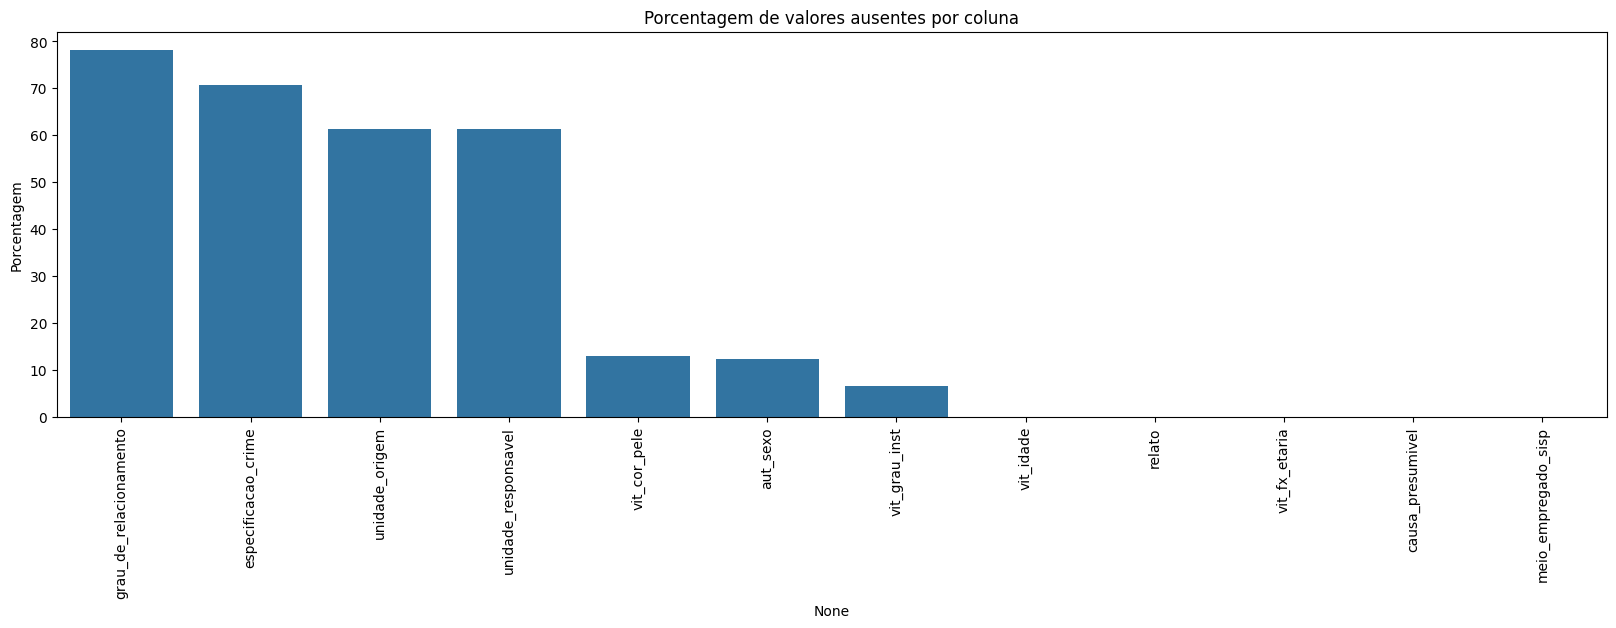

In [74]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia", "consolidado", "causa_presumivel", "vit_sexo", "relato" e "meio_empregado_sisp"  tem poucos valores missing, serao removidas apenas as linhas com valores faltantes. As colunas vit_idade e vit_fx_etaria serão usadas posteriormente para tratamento da coluna vit_fx_etaria, portanto não é interessante a remoção de linhas nesta etapa.

In [75]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp", "consolidado", "causa_presumivel", "vit_sexo", "relato"], inplace=True)

In [76]:
crimes_df.reset_index(drop=True, inplace=True)

In [77]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,62771,78.163796
especificacao_crime,object,56778,70.701184
unidade_origem,object,49178,61.237501
unidade_responsavel,object,49178,61.237501
vit_cor_pele,object,10405,12.956529
aut_sexo,object,9829,12.239282
vit_grau_inst,object,5317,6.620843
vit_idade,float64,29,0.036111
vit_fx_etaria,object,13,0.016188


Salvando as alterações em um novo dataframe

In [78]:
crimes_df.to_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv', index=False)

In [79]:
crimes_selecionados_belem = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv')

C:\Users\carlo\AppData\Local\Temp\ipykernel_9620\569967415.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_selecionados_belem = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv')


### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [81]:
colunas_com_NaN = ["grau_de_relacionamento","especificacao_crime",
                   "unidade_responsavel","unidade_origem","vit_cor_pele","vit_grau_inst",
                   "aut_sexo","vit_idade","vit_fx_etaria"]
crimes_selecionados_belem.loc[:, colunas_com_NaN] = crimes_selecionados_belem.loc[:, colunas_com_NaN].fillna("Nao informado")

In [82]:
crimes_selecionados_belem.isnull().sum()

unidade_origem            0
unidade_responsavel       0
dia_semana                0
fx_4_hor                  0
mes_fato                  0
ano_fato                  0
data_fato                 0
consolidado               0
especificacao_crime       0
causa_presumivel          0
meio_empregado_sisp       0
bairros                   0
local_ocorrencia          0
vit_idade                 0
vit_fx_etaria             0
vit_sexo                  0
vit_cor_pele              0
vit_grau_inst             0
grau_de_relacionamento    0
relato                    0
aut_sexo                  0
dtype: int64

### 2. Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

##### 2.1 Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- vit_sexo

In [83]:
crimes_selecionados_belem.vit_sexo.value_counts()

vit_sexo
F         47550
M         32475
PJ          123
PARDA       105
P            44
NI            8
BRANCA        1
JL            1
Name: count, dtype: int64

In [85]:
crimes_selecionados_belem[crimes_selecionados_belem['vit_sexo'] == 'BRANCA']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
28980,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,TER,18 |-- 24,JANEIRO,2020,2020-01-14,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,GUAMA,RESIDENCIA PARTICULAR,37.0,ADULTO IV (35 A 64 ANOS),BRANCA,F,ENSINO MEDIO INCOMPLETO,Nao informado,<p>Foi AGREDIDA FISICAMENTE e AMEAÇADA por seu...,M


Nesta linha da base, é perceptivel o erro na transcrição das informações, visto que a coluna vit_cor_pel e vit_sexo estao com os valores trocados. Como se trata de um caso sobre violencia contra a mulher, será feita a correção.

In [86]:
condicao_sexo_cor = (crimes_selecionados_belem['vit_sexo'] == 'BRANCA') & (crimes_selecionados_belem['vit_cor_pele'] == 'F')
crimes_selecionados_belem.loc[condicao_sexo_cor, ['vit_sexo', 'vit_cor_pele']] = ['F', 'BRANCA']

In [87]:
crimes_selecionados_belem[crimes_selecionados_belem['vit_sexo'] == 'PARDA']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
16592,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,SAB,06 |-- 12,JANEIRO,2020,2020-01-11,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,OUTROS MEIOS,CREMACAO,VIA PUBLICA,23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO INCOMPLETO,Nao informado,<p>A Comunicante vem informar que foi lesionad...,Nao informado
16615,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,QUI,12 |-- 18,JANEIRO,2020,2020-01-16,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,PEDREIRA,PREDIO,22.0,ADULTO II (25 A 29 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,EX-COMPANHEIRO(A),"<p>A Sra. SILVIANNE RAMONY RABELO MONTEIRO, Co...",F
17918,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,DOM,18 |-- 24,JANEIRO,2020,2020-01-05,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,CIDADE VELHA,"CAFE, BAR, RESTAURANTE",31.0,ADULTO III (30 A 34 ANOS),PARDA,M,ENSINO MEDIO COMPLETO,Nao informado,<p>O Relator vem a esta Seccional informar que...,Nao informado
17919,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,DOM,12 |-- 18,JANEIRO,2020,2020-01-26,LESAO CORPORAL,VIOLENCIA DOMESTICA,ALCOOLISMO / EMBRIAGUEZ,OUTROS MEIOS,CREMACAO,VIA PUBLICA,63.0,ADULTO IV (35 A 64 ANOS),PARDA,M,ENSINO FUNDAMENTAL COMPLETO,SOBRINHO(A),<p>O relator compareceu a esta unidade para in...,M
17922,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,QUI,12 |-- 18,JANEIRO,2020,2020-01-16,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,36.0,ADULTO IV (35 A 64 ANOS),PARDA,M,ENSINO MEDIO COMPLETO,Nao informado,<p>O cidadão acima qualificado compareceu à es...,Nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30723,MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP,MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP,SEG,06 |-- 12,JANEIRO,2020,2020-01-06,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,MARCO,VIA PUBLICA,52.0,ADULTO IV (35 A 64 ANOS),PARDA,M,ENSINO MEDIO COMPLETO,Nao informado,<p>Comunica o relator que na data de hoje (06/...,F
31002,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,SEX,18 |-- 24,JANEIRO,2020,2020-01-31,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TERRA FIRME,RESIDENCIA PARTICULAR,17.0,ADOLESCENTE (12 A 17 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>A Cidadã acima identificada compareceu a es...,Nao informado
31035,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,SEG,00 |-- 06,JANEIRO,2020,2020-01-20,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,20.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,<p>Foi AGREDIDA FISICAMENTE por sua mãe RINDAH...,Nao informado
31045,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DOM,00 |-- 06,JANEIRO,2020,2020-01-12,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,SEM INSTRUMENTO,SACRAMENTA,"CAFE, BAR, RESTAURANTE",23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>///////////A declarante acima qualificada c...,Nao informado


Para tratar melhor as linhas com 'PARDA' na coluna 'vit_sexo', serão excluidos as linhas em que a vitima não é do sexo feminino e os valores 'JL', 'JA LANCADO', 'P', 'NI', 'PJ, EP E OUTROS', 'PREJUDICADO' E 'PJ'

In [95]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_sexo']=='PJ'].index, inplace=True)

In [94]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_sexo']=='M'].index, inplace=True)

In [96]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_sexo']=='P'].index, inplace=True)

In [97]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_sexo']=='JL'].index, inplace=True)

In [98]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_sexo']=='NI'].index, inplace=True)

In [99]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [100]:
crimes_selecionados_belem.vit_sexo.value_counts()

vit_sexo
F        47551
PARDA      105
Name: count, dtype: int64

In [101]:
crimes_selecionados_belem[(crimes_selecionados_belem['vit_sexo'] == 'PARDA') & (crimes_selecionados_belem['vit_cor_pele'] == 'F')]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
9885,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP,SAB,06 |-- 12,JANEIRO,2020,2020-01-11,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,OUTROS MEIOS,CREMACAO,VIA PUBLICA,23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO INCOMPLETO,Nao informado,<p>A Comunicante vem informar que foi lesionad...,Nao informado
9906,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,QUI,12 |-- 18,JANEIRO,2020,2020-01-16,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,PEDREIRA,PREDIO,22.0,ADULTO II (25 A 29 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,EX-COMPANHEIRO(A),"<p>A Sra. SILVIANNE RAMONY RABELO MONTEIRO, Co...",F
10763,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DOM,18 |-- 24,JANEIRO,2020,2020-01-19,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,OUTROS MEIOS,TERRA FIRME,RESIDENCIA PARTICULAR,24.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO INCOMPLETO,Nao informado,<p>Que compareceu a esta especializada para de...,M
10773,"ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...","ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...",DOM,00 |-- 06,JANEIRO,2020,2020-01-19,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,PARACURI,RESIDENCIA PARTICULAR,45.0,ADULTO IV (35 A 64 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,"<p>Compareceu nesta Seccional de Icoaraci, LUI...",M
10799,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,QUA,00 |-- 06,JANEIRO,2020,2020-01-01,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,OUTROS MEIOS,MANGUEIRAO,RESIDENCIA PARTICULAR,48.0,ADULTO IV (35 A 64 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,<p>Compareceu nesta especializada a declarante...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...,TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...,TER,06 |-- 12,JANEIRO,2020,2020-01-21,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TENONE,VIA PUBLICA,36.0,ADULTO IV (35 A 64 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,EX-NAMORADO(A),<p>A nacional qualificada compareceu nesta UIP...,M
18381,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,SEX,18 |-- 24,JANEIRO,2020,2020-01-31,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,TERRA FIRME,RESIDENCIA PARTICULAR,17.0,ADOLESCENTE (12 A 17 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>A Cidadã acima identificada compareceu a es...,Nao informado
18402,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,SEG,00 |-- 06,JANEIRO,2020,2020-01-20,LESAO CORPORAL,VIOLENCIA DOMESTICA,ODIO OU VINGANCA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,RESIDENCIA PARTICULAR,20.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO MEDIO COMPLETO,Nao informado,<p>Foi AGREDIDA FISICAMENTE por sua mãe RINDAH...,Nao informado
18412,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER ...,DOM,00 |-- 06,JANEIRO,2020,2020-01-12,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,SEM INSTRUMENTO,SACRAMENTA,"CAFE, BAR, RESTAURANTE",23.0,ADULTO I (18 A 24 ANOS),PARDA,F,ENSINO FUNDAMENTAL INCOMPLETO,Nao informado,<p>///////////A declarante acima qualificada c...,Nao informado


In [102]:
condicao_sexo_cor_1 = (crimes_selecionados_belem['vit_sexo'] == 'PARDA') & (crimes_selecionados_belem['vit_cor_pele'] == 'F')
crimes_selecionados_belem.loc[condicao_sexo_cor_1, ['vit_sexo', 'vit_cor_pele']] = ['F', 'PARDA']
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

O restante são valores que estão preenchidos com 'M' na coluna 'vit_cor_pele', serão excluidos a seguir no tratamento da coluna em questao

In [103]:
crimes_selecionados_belem.vit_sexo.value_counts()

vit_sexo
F        47645
PARDA       11
Name: count, dtype: int64

- vit_cor_pele

In [104]:
crimes_selecionados_belem.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO      33202
Nao informado     6124
NAO INFORMADO     5218
PARDA             2874
BRANCA             133
PRETA               91
M                   11
INDIGENA             2
AMARELA              1
Name: count, dtype: int64

In [105]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_cor_pele == "Nao informado",'vit_cor_pele']= 'PREJUDICADO'

In [106]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_cor_pele == "NAO INFORMADO",'vit_cor_pele']= 'PREJUDICADO'

In [107]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_cor_pele']=='M'].index, inplace=True)

In [108]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [109]:
crimes_selecionados_belem.vit_cor_pele.value_counts()

vit_cor_pele
PREJUDICADO    44544
PARDA           2874
BRANCA           133
PRETA             91
INDIGENA           2
AMARELA            1
Name: count, dtype: int64

- local_ocorrencia

In [110]:
local_ocorrencia_unico = crimes_selecionados_belem["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  92


['VIA PUBLICA',
 'HOSPITAL',
 'RESIDENCIA PARTICULAR',
 'CAFE, BAR, RESTAURANTE',
 'OUTROS',
 'CASA DE TOLERANCIA',
 'CRECHE',
 'INTERNET',
 'CONDOMINIO RESIDENCIAL',
 'CASA COMERCIAL',
 'ESTABELECIMENTO DE ENSINO',
 'HABITACAO COLETIVA',
 'EDIFICIO PUBLICO',
 'LOGRADORO PUBLICO',
 'HOTEL, PENSAO, ETC',
 'CONDOMINIO COMERCIAL',
 'ESTABELECIMENTO BANCARIO',
 'TRANSPORTE',
 'PREDIO',
 'BAR',
 'PENITENCIARIA, REFORMATORIO',
 'TERRENO BALDIO',
 'LOJAS DE CONVENIENCIA',
 'OUTROS ESTADOS',
 'CAIXA ELETRONICO',
 'VIA FERREA',
 'CLINICA',
 'CLINICA ',
 'VIA PUBLICA ',
 'MAR, RIO, LAGOA',
 'SUPERMERCADO ',
 'CAFE,BAR,ETC',
 'POSTO DE GASOLINA',
 'TRANSPORTE ',
 'PROPRIEDADE AGROPASTORIL',
 'ACADEMIA',
 'PROSTIBULO',
 'INDUSTRIA',
 'CASA DE SHOW',
 'LANCHONETE',
 'ABRIGO',
 'PARQUE',
 'ARENA',
 'PREDIO EM OBRAS',
 'CARRO FORTE',
 'TRANSPORTE POR APLICATIVO',
 'INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)',
 'RESIDENCIA',
 'ESTABELECIMENTOS DE SAUDE',

In [111]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [112]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "LOGRADORO PUBLICO",'local_ocorrencia'] = 'VIA PUBLICA'

In [113]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [114]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [115]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [116]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [117]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "TRANSPORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [118]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [119]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [120]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [121]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [122]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [123]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [124]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [125]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [126]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [127]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [128]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [129]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [130]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [131]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [132]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [133]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [134]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [135]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [136]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [137]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia =="CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [138]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [139]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [140]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [141]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia =="AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [142]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [143]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "CAFE,BAR,ETC",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [144]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "CAFE, BAR, RESTAURANTE",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [145]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia =="BAR",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [146]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia =="OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [147]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.local_ocorrencia == "OUTROS",'local_ocorrencia'] = 'OUTROS LOCAIS'

In [148]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [149]:
novo_local_ocorrencia_unico = crimes_selecionados_belem["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 65


array(['VIA PUBLICA', 'HOSPITAL', 'RESIDENCIA PARTICULAR',
       'CAFE, BAR, RESTAURANTE, ETC', 'OUTROS LOCAIS',
       'LOCAL DE PROSTITUICAO', 'CRECHE', 'INTERNET',
       'CONDOMINIO RESIDENCIAL', 'CASA COMERCIAL',
       'ESTABELECIMENTO DE ENSINO', 'HABITACAO COLETIVA',
       'EDIFICIO PUBLICO', 'HOTEL, PENSAO, ETC', 'CONDOMINIO COMERCIAL',
       'ESTABELECIMENTO BANCARIO', 'TRANSPORTE(PUBLICO, URBANO, ETC)',
       'PREDIO', 'PENITENCIARIA, REFORMATORIO', 'TERRENO BALDIO',
       'LOJA DE CONVENIENCIA', 'OUTROS ESTADOS', 'CAIXA ELETRONICO',
       'ESTACAO FERROVIARIA', 'CLINICA', 'MAR, RIO, LAGOA',
       'SUPERMERCADO', 'POSTO DE GASOLINA', 'PROPRIEDADE AGROPASTORIL',
       'ACADEMIA', 'ESTABELECIMENTO INDUSTRIAL', 'CASA DE SHOW',
       'LANCHONETE', 'CASA DE ABRIGO E ASSISTENCIA', 'PARQUE', 'ARENA',
       'CARRO FORTE', 'ESTABELECIMENTOS DE SAUDE', 'EMBARCACAO',
       'OBRA/CONSTRUCAO CIVIL', 'NAO INFORMADO', 'INSTITUICAO PUBLICA',
       'ESTABELECIMENTO COMERCIAL', 'V

- Grau de relacionamento

In [150]:
grau_de_relac_unico = crimes_selecionados_belem["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 53


array(['Nao informado', 'COMPANHEIRO(A)', 'NAO INFORMADO',
       'EX-COMPANHEIRO(A)', 'VIZINHO(A)', 'PADRASTO', 'AVO', 'AMIGO(A)',
       'SOGRO(A)', 'PRIMO(A)', 'PAI', 'TIO(A)', 'NAMORADO(A)', 'IRMAO(A)',
       'FILHO(A)', 'MAE', 'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)',
       'SOBRINHO(A)', 'MADRASTA', 'EX-PADRASTO', 'EX-NAMORADO(A)',
       'CONHECIDO(A)', 'PADRINHO', 'EX-NORA', 'EX-PADASTRO', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'PJ, EP E OUTROS',
       'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'NETO(A)', 'MARIDO',
       'BISAVO', 'EX-SOGRO(A)', 'MADRINHA', 'CHEFE',
       'PARENTE POR AFINIDADE', 'PROFESSOR(A)', 'PRIMA', 'TIO', 'TIO(A',
       'NETO', 'EX-CUNHADA', 'EX-SOGRA', 'EX-SOGRO (A)',
       'PAI DO PADRASTO', 'PADASTRO', 'PREJUDICADOQ', 'FILHO'],
      dtype=object)

In [151]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [152]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "AVO",'grau_de_relacionamento'] =  'AVO(A)'

In [153]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "FILHO",'grau_de_relacionamento'] =  'FILHO(A)'

In [154]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [155]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento =="TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [156]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [157]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [158]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [159]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [160]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "PADASTRO",'grau_de_relacionamento'] =  'PADRASTO'

In [161]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [162]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "PREJUDICADOQ",'grau_de_relacionamento'] =  'PREJUDICADO'

In [163]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento =="EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [164]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [165]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['grau_de_relacionamento']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
10658,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,NOVEMBRO,2020,2020-11-05,HOMICIDIO CULPOSO,ERRO MEDICO,OUTRAS,OUTROS MEIOS,PARQUE VERDE,HOSPITAL,23.0,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",<p>A relatora vem a esta seccional comunicar q...,PJ
19075,Nao informado,Nao informado,TER,06 |-- 12,MARCO,2021,2021-03-23,LESAO CORPORAL,ERRO MEDICO,OUTRAS,SEM INSTRUMENTO,NAZARE,HOSPITAL,25.0,ADULTO II (25 A 29 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,"PJ, EP E OUTROS",<P>A CIDADA ACIMA IDENTIFICADA COMUNICA NESTA ...,PJ
27978,Nao informado,Nao informado,QUA,00 |-- 06,FEVEREIRO,2021,2021-02-03,LESAO CORPORAL,NEGLIGENCIA MEDICA,OUTRAS,OUTROS MEIOS,UMARIZAL,HOSPITAL,32.0,ADULTO III (30 A 34 ANOS),F,PARDA,ENSINO SUPERIOR COMPLETO,"PJ, EP E OUTROS",<P>A CIDADA ACIMA QUALIFICADA COMPARECEU NESTA...,PJ


As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [166]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

Verificando inconsistencias na coluna do autor do crime de acordo com o grau de relacionamento que é "PAI"

In [167]:
df_filtrado = crimes_selecionados_belem[(crimes_selecionados_belem['grau_de_relacionamento'] == 'PAI') & (crimes_selecionados_belem['aut_sexo'] == 'F')]
df_filtrado

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
17187,DELEGACIA DE PROTECAO A CRIANCA E ADOLESCENTE ...,DELEGACIA DE PROTECAO A CRIANCA E ADOLESCENTE ...,SEG,12 |-- 18,OUTUBRO,2020,2020-10-12,LESAO CORPORAL,VIOLENCIA DOMESTICA,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,PEDREIRA,RESIDENCIA PARTICULAR,12.0,ADOLESCENTE (12 A 17 ANOS),F,PARDA,NAO INFORMADO,PAI,<p>O relator em epígrafe é tio paterno da adol...,F
28235,Nao informado,Nao informado,QUA,06 |-- 12,MAIO,2022,2022-05-18,ESTUPRO DE VULNERAVEL,MENOR/VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,COQUEIRO BELEM,RESIDENCIA PARTICULAR,7.0,CRIANCA (0 A 11 ANOS),F,PREJUDICADO,PREJUDICADO,PAI,<P>A RELATORA ACIMA QUALIFICADA NA QUALIDADE D...,F


Para tratar esta incosistencia entre o sexo do autor e parentesco atribuido iremos verificar o relato da pessoa que realizou a denuncia

In [168]:
texto_lista = df_filtrado['relato'].to_list()
for texto in texto_lista:
    print(texto)

<p>O relator em epígrafe é tio paterno da adolescente <b>TAIS&nbsp;DA CONCEIÇÃO SANTANA</b>, 12 anos que teria sido agredida fisicamente pelo genitor TIAGO DE OLIVEIRA SANTANA e pela madrasta ALIRIA REIS ARAUJO; QUE há aproximadamente três meses os fatos vêm ocorrendo, na casa onde a adoelscente mora, pois apesar de TIAGO e ALIRIA não residirem no msmso local, têm livre acesso e sempre vão lá, e agridem a adolescente; QUE na data de ontem, TAIS ligou para o declarante pedindo ajuda, pois TIAGO tinha batido muito nela, e quando chegou, ela lhe relatou que "TIAGO bateu em seu peito, esfregou a mão na cara dela, dizendo que ia matar ela, tentou enforcá-la, sendo que a mesma está com marcas no pulso e com dores nos pescoço" (textuais); QUE além de TIAGO, ALIRIA também agride a adolescente e costuma puxar o cabelo e arranhar TAIS; QUE foi encaminhada para EXAME DE LESÃO COPORAL; QUE&nbsp;esclarece que quem tem a guarda de TAIS é a genitora dela, que nunca cuidou, sendo que quem criou TAIS&n

Nos dois relatos e possivel observar que se trata de um autor do sexo masculino, logo a alteração na coluna "aut_sexo" se faz necessaria.

In [169]:
crimes_selecionados_belem.loc[(crimes_selecionados_belem['grau_de_relacionamento'] == 'PAI') & (crimes_selecionados_belem['aut_sexo'] == 'F'), 'aut_sexo'] = 'M'

In [170]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [171]:
novo_grau_de_relac_unico = crimes_selecionados_belem["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 39


array(['NAO INFORMADO', 'COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)',
       'VIZINHO(A)', 'PADRASTO', 'AVO(A)', 'AMIGO(A)', 'SOGRO(A)',
       'PRIMO(A)', 'PAI', 'TIO(A)', 'NAMORADO(A)', 'IRMAO(A)', 'FILHO(A)',
       'MAE', 'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)', 'SOBRINHO(A)',
       'MADRASTA', 'EX-PADRASTO', 'EX-NAMORADO(A)', 'CONHECIDO(A)',
       'PADRINHO', 'EX-NORA', 'NORA', 'PARENTESCO POR AFINIDADE',
       'PREJUDICADO', 'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'NETO(A)',
       'MARIDO', 'BISAVO', 'EX-SOGRO(A)', 'MADRINHA', 'CHEFE',
       'PROFESSOR(A)', 'PAI DO PADRASTO'], dtype=object)

- vit_fx_etaria	

In [172]:
vit_fx_etaria_unico = crimes_selecionados_belem["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 11


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      22265
ADULTO I (18 A 24 ANOS)        7290
ADULTO III (30 A 34 ANOS)      6700
ADULTO II (25 A 29 ANOS)       6615
ADOLESCENTE (12 A 17 ANOS)     1649
IDOSO (65 ANOS OU MAIS)        1412
CRIANCA (0 A 11 ANOS)          1193
PREJUDICADO                     409
NAO INFORMADO                   104
PJ, EP E OUTROS                  12
Name: count, dtype: int64

In [173]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_fx_etaria']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
18355,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,SEG,12 |-- 18,DEZEMBRO,2020,2020-12-21,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,OUTROS LOCAIS,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",Nao informado
31625,Nao informado,Nao informado,SEX,18 |-- 24,AGOSTO,2022,2022-08-26,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,BATISTA CAMPOS,INTERNET,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,NAO INFORMADO,"<P>O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAV...",P
31626,Nao informado,Nao informado,DOM,12 |-- 18,AGOSTO,2022,2022-08-14,AMEACA,Nao informado,ODIO OU VINGANCA,OUTROS MEIOS,COQUEIRO BELEM,CONDOMINIO RESIDENCIAL,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NAO INFORMADO,<P>A RELATORA ACIMA QUALIFICADA COMPARECEU A E...,P
31627,Nao informado,Nao informado,DOM,18 |-- 24,AGOSTO,2022,2022-08-28,AMEACA,Nao informado,AMBICAO,OUTROS MEIOS,COQUEIRO BELEM,RESIDENCIA PARTICULAR,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,<P>A DEPOENTE COMPARECE NESTA DIRETORIA PARA C...,P
31628,Nao informado,Nao informado,SAB,12 |-- 18,AGOSTO,2022,2022-08-27,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,GUAMA,RESIDENCIA PARTICULAR,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO INCOMPLETO,NAO INFORMADO,<P>A RELATORA CLAUDIANE GOMES FERREIRA COMUNIC...,P
31629,Nao informado,Nao informado,DOM,06 |-- 12,AGOSTO,2022,2022-08-28,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,RESIDENCIA PARTICULAR,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO FUNDAMENTAL COMPLETO,NAO INFORMADO,"<P>A RELATORA ACIMA QUALIFICADA, COMPARECEU NE...",P
31630,Nao informado,Nao informado,DOM,18 |-- 24,AGOSTO,2022,2022-08-28,AMEACA,PREJUDICADO,OUTRAS,OUTROS MEIOS,CASTANHEIRA,RESIDENCIA PARTICULAR,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,<P><I>A SENHORA ACIMA QUALIFICADA COMPARECEU N...,F
33428,Nao informado,Nao informado,DOM,06 |-- 12,AGOSTO,2022,2022-08-28,LESAO CORPORAL,PREJUDICADO,OUTRAS,OUTROS MEIOS,COQUEIRO BELEM,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,PREJUDICADO,"<P>O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAV...",F
33429,Nao informado,Nao informado,TER,18 |-- 24,AGOSTO,2022,2022-08-16,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,REDUTO,"CAFE, BAR, RESTAURANTE, ETC",88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,NAO INFORMADO,"<P>O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAV...",P
33430,Nao informado,Nao informado,DOM,18 |-- 24,AGOSTO,2022,2022-08-28,AMEACA,Nao informado,ALCOOLISMO / EMBRIAGUEZ,SEM INSTRUMENTO,COQUEIRO BELEM,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,NAO INFORMADO,<P>A RELATORA ACIMA IDENTIFICADA COMUNICA NEST...,P


In [174]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [175]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_fx_etaria']=='PREJUDICADO']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
21,DIVISAO DE HOMICIDIOS,DIVISAO DE HOMICIDIOS,SEG,18 |-- 24,JUNHO,2019,2019-06-17,HOMICIDIO,EM DECOMPOSICAO,ODIO OU VINGANCA,ARMA DE FOGO,CURIO-UTINGA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,<p>&nbsp;A quipe de planatao desta Divisao foi...,NI
46,TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...,TENONE UNIDADE INTEGRADA PROPAZ - 1ª RISP - 13...,DOM,12 |-- 18,MAIO,2019,2019-05-19,AMEACA,VIOLENCIA DOMESTICA/MARIA DA PENHA,ALCOOLISMO / EMBRIAGUEZ,SEM INSTRUMENTO,TENONE,RESIDENCIA PARTICULAR,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,COMPANHEIRO(A),"<p>O condutor, declarou que na data de hoje, e...",M
67,DEL.VIRTUAL - 277,SAO BRAS - PATRIMONIO 228 - 1º RISP- 2ª AISP,QUI,12 |-- 18,JUNHO,2019,2019-06-20,AMEACA,NAO INFORMADO,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,NAZARE,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,NAO INFORMADO,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",M
73,"ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...","ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E...",SEG,12 |-- 18,OUTUBRO,2019,2019-10-28,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,OUTRAS,OUTROS MEIOS,CAMPINA DE ICOARACI,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,NAO INFORMADO,COMPANHEIRO(A),<p>A relatora vem representar contra seu compa...,M
89,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,QUI,06 |-- 12,FEVEREIRO,2019,2019-02-21,AMEACA,NAO INFORMADO,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,Nao informado,NAO INFORMADO,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",NI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,Nao informado,Nao informado,SEX,18 |-- 24,DEZEMBRO,2023,2023-12-01,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,COQUEIRO BELEM,OUTROS LOCAIS,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,FILHO(A),"<P>O RELATOR, ACIMA QUALIFICADO, COMPARECEU A ...",M
47080,Nao informado,Nao informado,TER,06 |-- 12,DEZEMBRO,2023,2023-12-05,LESAO CORPORAL,VIOLENCIA DOMESTICA,OUTRAS,OUTROS MEIOS,SACRAMENTA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,EX-COMPANHEIRO(A),"<P>QUE ESTAVAM REALIZANDO RONDA, NO FINAL DO S...",M
47295,Nao informado,Nao informado,DOM,18 |-- 24,DEZEMBRO,2023,2023-12-10,LESAO CORPORAL,VIOLENCIA DOMESTICA,CIUME,SEM INSTRUMENTO,CONDOR,RESIDENCIA PARTICULAR,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,COMPANHEIRO(A),<P>QUE O RELATOR COMPARECEU NESTA DELEGACIA ES...,M
47436,Nao informado,Nao informado,SEG,06 |-- 12,DEZEMBRO,2023,2023-12-18,LESAO CORPORAL,Nao informado,OUTRAS,OUTROS MEIOS,MANGUEIRAO,"TRANSPORTE(PUBLICO, URBANO, ETC)",66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,NAO INFORMADO,"<P>O RELATOR ACIMA QUALIFICADO, COMPARECEU NES...",P


In [176]:
filtro_vit_fx_etaria_1 = (crimes_selecionados_belem['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_1 = crimes_selecionados_belem[filtro_vit_fx_etaria_1]
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [177]:
idade_vit

vit_idade
66666.0          338
99999.0           55
Nao informado      7
36.0               2
41.0               2
32.0               1
37.0               1
88888.0            1
2.0                1
Name: count, dtype: int64

In [178]:
crimes_selecionados_belem[(crimes_selecionados_belem['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_belem['vit_idade'] == 36.0)]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo
4484,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,SEG,06 |-- 12,OUTUBRO,2019,2019-10-28,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,ODIO OU VINGANCA,OUTROS MEIOS,UMARIZAL,RESIDENCIA PARTICULAR,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,FILHO(A),<p>A nacional acima qualificada compareceu a e...,F
5553,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,DOM,12 |-- 18,AGOSTO,2019,2019-08-25,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,OUTRAS,OUTROS MEIOS,PEDREIRA,RESIDENCIA PARTICULAR,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,IRMAO(A),<p>A relatora vem a esta seccional comunicar q...,M


In [179]:
crimes_selecionados_belem.loc[(crimes_selecionados_belem['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_belem['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [180]:
crimes_selecionados_belem.loc[(crimes_selecionados_belem['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_belem['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [181]:
crimes_selecionados_belem.loc[(crimes_selecionados_belem['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_belem['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [182]:
crimes_selecionados_belem.loc[(crimes_selecionados_belem['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_selecionados_belem['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

Agora a coluna 'vit_idade' pode ser excluida 

In [183]:
crimes_selecionados_belem = crimes_selecionados_belem.drop(columns=['vit_idade'])
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [184]:
novo_vit_fx_etaria_unico = crimes_selecionados_belem["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 10


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      22265
ADULTO I (18 A 24 ANOS)        7290
ADULTO III (30 A 34 ANOS)      6700
ADULTO II (25 A 29 ANOS)       6615
ADOLESCENTE (12 A 17 ANOS)     1649
IDOSO (65 ANOS OU MAIS)        1412
CRIANCA (0 A 11 ANOS)          1193
PREJUDICADO                     409
NAO INFORMADO                   104
PJ, EP E OUTROS                  12
Name: count, dtype: int64

Como as linhas que contem 'PJ, EP E OUTROS' não são interessantes para a analise serão excluidos

In [185]:
crimes_selecionados_belem.drop(crimes_selecionados_belem.loc[crimes_selecionados_belem['vit_fx_etaria']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [186]:
novo_vit_fx_etaria_unico = crimes_selecionados_belem["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 9


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      22265
ADULTO I (18 A 24 ANOS)        7290
ADULTO III (30 A 34 ANOS)      6700
ADULTO II (25 A 29 ANOS)       6615
ADOLESCENTE (12 A 17 ANOS)     1649
IDOSO (65 ANOS OU MAIS)        1412
CRIANCA (0 A 11 ANOS)          1193
PREJUDICADO                     409
NAO INFORMADO                   104
PJ, EP E OUTROS                  12
Name: count, dtype: int64

- meio_empregado_sisp

In [187]:
crimes_selecionados_belem.meio_empregado_sisp.value_counts()

meio_empregado_sisp
OUTROS MEIOS                   26321
SEM INSTRUMENTO                18482
ARMA CORTANTE OU PERFURANTE      978
ARMA CONTUNDENTE                 910
ARMA PERFURO CORTANTE            360
ARMA DE FOGO                     329
AUTOMOVEL DE PASSEIO              71
ONIBUS                            70
MOTOCICLETA                       48
AUTOMOVEL COMERCIAL               14
FOGO                              13
VENENO - OUTROS TIPOS              8
WHATSAPP                           5
CAMINHAO                           5
BICICLETA                          5
VENENO - CHUMBINHO                 3
OUTROS                             3
NAO INFORMADO                      2
INSTAGRAM                          2
FACEBOOK                           1
Name: count, dtype: int64

In [188]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.meio_empregado_sisp == "OUTROS",'meio_empregado_sisp'] = 'OUTROS MEIOS'

In [189]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.meio_empregado_sisp =="FACEBOOK",'meio_empregado_sisp'] = 'REDES SOCIAIS'

In [190]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.meio_empregado_sisp =="INSTAGRAM",'meio_empregado_sisp'] = 'REDES SOCIAIS'

In [191]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.meio_empregado_sisp == "WHATSAPP",'meio_empregado_sisp'] = 'REDES SOCIAIS'

In [194]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.meio_empregado_sisp == "VENENO - CHUMBINHO",'meio_empregado_sisp'] = 'VENENO'

In [195]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.meio_empregado_sisp == "VENENO - OUTROS TIPOS",'meio_empregado_sisp'] = 'VENENO'

In [196]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [197]:
crimes_selecionados_belem.meio_empregado_sisp.value_counts()

meio_empregado_sisp
OUTROS MEIOS                   26324
SEM INSTRUMENTO                18482
ARMA CORTANTE OU PERFURANTE      978
ARMA CONTUNDENTE                 910
ARMA PERFURO CORTANTE            360
ARMA DE FOGO                     329
AUTOMOVEL DE PASSEIO              71
ONIBUS                            70
MOTOCICLETA                       48
AUTOMOVEL COMERCIAL               14
FOGO                              13
VENENO                            11
REDES SOCIAIS                      8
CAMINHAO                           5
BICICLETA                          5
NAO INFORMADO                      2
Name: count, dtype: int64

- causa_presumivel

In [198]:
crimes_selecionados_belem.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   22951
ODIO OU VINGANCA                         15847
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     2081
CIUME                                     1815
DEVASSIDAO                                1633
ALCOOLISMO / EMBRIAGUEZ                   1423
AMBICAO                                   1357
ENTORPECENTES                              256
ALIENACAO                                  117
ACIDENTAL                                   57
ÓDIO OU VINGANÇA                            30
ÓDIO OU VINGANCA                            28
LGBTFOBIA                                   14
CIÚME                                        9
DEVASSIDÃO                                   7
AMBICÃO                                      4
AMBIÇÃO                                      1
Name: count, dtype: int64

In [199]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.causa_presumivel == "AMBICÃO",'causa_presumivel'] = 'AMBIÇÃO'

In [200]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.causa_presumivel == "AMBICAO",'causa_presumivel'] = 'AMBIÇÃO'

In [201]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.causa_presumivel == "ÓDIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [202]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.causa_presumivel == "ODIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [203]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.causa_presumivel == "CIUME",'causa_presumivel'] = 'CIÚME'

In [204]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.causa_presumivel == "DEVASSIDAO",'causa_presumivel'] = 'DEVASSIDÃO'

In [205]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [206]:
crimes_selecionados_belem.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   22951
ÓDIO OU VINGANÇA                         15905
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     2081
CIÚME                                     1824
DEVASSIDÃO                                1640
ALCOOLISMO / EMBRIAGUEZ                   1423
AMBIÇÃO                                   1362
ENTORPECENTES                              256
ALIENACAO                                  117
ACIDENTAL                                   57
LGBTFOBIA                                   14
Name: count, dtype: int64

- fx_4_hor

In [208]:
crimes_selecionados_belem.fx_4_hor.value_counts()

fx_4_hor
18 |-- 24    15714
12 |-- 18    14006
06 |-- 12    13300
00 |-- 06     4610
Name: count, dtype: int64

* **unidade_origem**

Com o objetivo de padronizar a coluna 'unidade_origem', garantindo a uniformidade das delegacias de atendimento especializado à mulher, serão realizados ajustes para assegurar a consistência e padronização dos dados referentes a essas unidades.

In [215]:
unidade_origem_unico = crimes_selecionados_belem["unidade_origem"].unique()
print("Numero de valores unicos em unidade_origem:", len(unidade_origem_unico))
crimes_selecionados_belem["unidade_origem"].unique()

Numero de valores unicos em unidade_origem: 109


array(['TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'DIVISAO DE HOMICIDIOS',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP',
       'GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 17ª AISP',
       'DEACA-PROPAZ INTEGRADO-CPC RENATO CHAVES-504',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'TENONE U

In [210]:
unidades_com_deam = crimes_selecionados_belem[crimes_selecionados_belem['unidade_origem'].str.contains('deam', case=False)]['unidade_origem'].unique()
unidades_com_deam

array(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DEAM - BELEM 35 - 1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS'],
      dtype=object)

Todas as unidades da DEAM serão padronizadas para 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [211]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['unidade_origem'].isin(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP','DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DEAM - BELEM 35 - 1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ABAETETUBA - 4ª RISP TOCANTINS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS']), 'unidade_origem'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [212]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [213]:
unidades_com_deam = crimes_selecionados_belem[crimes_selecionados_belem['unidade_origem'].str.contains('deam', case=False)]['unidade_origem'].unique()
unidades_com_deam

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'],
      dtype=object)

In [214]:
unidade_origem_unico = crimes_selecionados_belem["unidade_origem"].unique()
print("Numero de valores unicos em unidade_origem:", len(unidade_origem_unico))
crimes_selecionados_belem["unidade_origem"].unique()

Numero de valores unicos em unidade_origem: 109


array(['TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'DIVISAO DE HOMICIDIOS',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP',
       'GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 17ª AISP',
       'DEACA-PROPAZ INTEGRADO-CPC RENATO CHAVES-504',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'TENONE U

* **unidade_responsavel**

In [216]:
unidade_responsavel_unico = crimes_selecionados_belem["unidade_responsavel"].unique()
print("Numero de valores unicos em unidade_ressponsavel:", len(unidade_responsavel_unico))
crimes_selecionados_belem["unidade_responsavel"].unique()

Numero de valores unicos em unidade_ressponsavel: 121


array(['TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'TAPANA - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 11ª AISP',
       'COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'DIVISAO DE HOMICIDIOS',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'BENGUI - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'DEACA-PROPAZ INTEGRADO-CP

In [217]:
unidades_com_deam_1 = crimes_selecionados_belem[crimes_selecionados_belem['unidade_responsavel'].str.contains('deam', case=False)]['unidade_responsavel'].unique()
unidades_com_deam_1

array(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP',
       'DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DEAM - BELEM 35 - 1º RISP- 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS'],
      dtype=object)

In [218]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['unidade_responsavel'].isin(['DIVISAO ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM ANANINDEUA - 2ª RISP','DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO  ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DEAM - BELEM 35 - 1º RISP- 8ª AISP','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM PARAUAPEBAS - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CASTANHAL - 3ª RISP GUAMA','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM CAPANEMA - 6ª RISP CAETE','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM MARABA - 10ª RISP CARAJAS','DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM SANTAREM - 12ª RISP BAIXO AMAZONAS']), 'unidade_responsavel'] = 'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'

In [219]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [220]:
unidade_responsavel_unico = crimes_selecionados_belem["unidade_responsavel"].unique()
print("Numero de valores unicos em unidade_ressponsavel:", len(unidade_responsavel_unico))
crimes_selecionados_belem["unidade_responsavel"].unique()

Numero de valores unicos em unidade_ressponsavel: 112


array(['TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 6ª AISP',
       'PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP',
       'DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM',
       'SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP',
       'CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'CREMACAO - 4ª SECCIONAL - 1ª RISP- 3ª AISP',
       'TAPANA - UNIDADE INTEGRADA PROPAZ - 1ª RISP - 11ª AISP',
       'COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP',
       'MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP',
       'ICOARACI - 8ª SECCIONAL - 1ª RISP - 11ª, 12ª E 13ª AISP ',
       'OUTEIRO - DELEGACIA DE POLICIA - 1ª RISP - 14ª AISP',
       'DIVISAO DE HOMICIDIOS',
       'MARCO - DELEGACIA DE POLICIA - 1ª RISP - 8ª AISP',
       'BENGUI - DELEGACIA DE POLICIA - 1ª RISP - 10ª AISP',
       'DEACA-PROPAZ INTEGRADO-CPC RENATO CHAVES-504',
       'GUAMA - 11ª SECCIONAL - 1ª RISP - 5ª AISP',
       'TE

In [221]:
unidades_com_deam_1 = crimes_selecionados_belem[crimes_selecionados_belem['unidade_responsavel'].str.contains('deam', case=False)]['unidade_responsavel'].unique()
unidades_com_deam_1

array(['DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHER - DEAM'],
      dtype=object)

- bairros

In [222]:
bairros_unico = crimes_selecionados_belem["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico))
crimes_selecionados_belem["bairros"].unique()

Numero unico em bairros: 85


array(['TERRA FIRME', 'PEDREIRA', 'MARAMBAIA', 'CABANAGEM', 'BARREIRO',
       'PONTA GROSSA', 'CONDOR', 'SOUZA', 'TAPANA', 'UMARIZAL',
       'AGUAS NEGRAS', 'MARACACUERA', 'JURUNAS', 'SAO JOAO DO OUTEIRO',
       'TELEGRAFO SEM FIO', 'CURIO-UTINGA', 'SAO BRAS', 'SACRAMENTA',
       'MANGUEIRAO', 'CASTANHEIRA', 'BENGUI', 'COTIJUBA',
       'COQUEIRO BELEM', 'MARACANGALHA', 'PARQUE VERDE', 'CANUDOS',
       'GUAMA', 'TENONE', 'MARCO', 'UNA', 'VILA', 'PARQUE GUAJARA',
       'NAZARE', 'CAMPINA', 'CAMPINA DE ICOARACI', 'CREMACAO', 'AGUA BOA',
       'REDUTO', 'CIDADE VELHA', 'CARANANDUBA', 'MARACAJA', 'FATIMA',
       'ITAITEUA', 'PRATINHA', 'ARIRAMBA', 'AGULHA', 'VAL-DE-CANS',
       'BATISTA CAMPOS', 'PARACURI', 'AEROPORTO', 'SAO FRANCISCO',
       'BRASILIA', 'CRUZEIRO', 'CHAPEU VIRADO', 'PRAIA GRANDE',
       'MURUBIRA', 'CARUARA', 'PORTO ARTHUR', 'SAO CLEMENTE',
       'BAIA DO SOL', 'FAROL', 'NATAL DO MURUBIRA', 'BAIA DO SOL ',
       'MANGUEIRAS', 'SUCURIJUQUARA', 'ITAITEUA ', 'AG

In [223]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "BAIA DO SOL ",'bairros'] = 'BAIA DO SOL'

In [224]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "ITAITEUA ",'bairros'] = 'ITAITEUA'

In [225]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "TELEGRAFO SEM FIO",'bairros'] = 'TELEGRAFO'

In [226]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "VAL-DE-CANS",'bairros'] = 'VAL-DE-CAES'

In [227]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "ILHA DO CUMBU",'bairros'] = 'ILHA DO COMBU'

In [228]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "INFRAERO",'bairros'] = 'VAL-DE-CAES'

In [229]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "ZONA RURAL DE MOSQUEIRO",'bairros'] = 'ILHA DO MOSQUEIRO'

In [230]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "COQUEIRO BELEM",'bairros'] = 'COQUEIRO'

In [231]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['bairros'].isin(["ILHAS DO ARQUIPELAGO DO RIO GUAMA", 'ILHAS ADJACENTES DO ARQUIPELAGO DE BELEM', 'ILHAS ADJACENTES']),'bairros'] = 'ILHAS ADJACENTES DO ARQUIPELAGO DE BELEM'

In [232]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "AGULHA ",'bairros'] = 'AGULHA'

In [233]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "PARQUE GUAJARA ",'bairros'] = 'PARQUE GUAJARA'

In [234]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "CARUARA ",'bairros'] = 'CARUARA'

In [235]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.bairros == "CAMPINA DE ICOARACI ",'bairros'] = 'CAMPINA DE ICOARACI'

In [236]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [237]:
bairros_unico_depois = crimes_selecionados_belem["bairros"].unique()
print("Numero unico em bairros:", len(bairros_unico_depois))
crimes_selecionados_belem["bairros"].unique()

Numero unico em bairros: 76


array(['TERRA FIRME', 'PEDREIRA', 'MARAMBAIA', 'CABANAGEM', 'BARREIRO',
       'PONTA GROSSA', 'CONDOR', 'SOUZA', 'TAPANA', 'UMARIZAL',
       'AGUAS NEGRAS', 'MARACACUERA', 'JURUNAS', 'SAO JOAO DO OUTEIRO',
       'TELEGRAFO', 'CURIO-UTINGA', 'SAO BRAS', 'SACRAMENTA',
       'MANGUEIRAO', 'CASTANHEIRA', 'BENGUI', 'COTIJUBA', 'COQUEIRO',
       'MARACANGALHA', 'PARQUE VERDE', 'CANUDOS', 'GUAMA', 'TENONE',
       'MARCO', 'UNA', 'VILA', 'PARQUE GUAJARA', 'NAZARE', 'CAMPINA',
       'CAMPINA DE ICOARACI', 'CREMACAO', 'AGUA BOA', 'REDUTO',
       'CIDADE VELHA', 'CARANANDUBA', 'MARACAJA', 'FATIMA', 'ITAITEUA',
       'PRATINHA', 'ARIRAMBA', 'AGULHA', 'VAL-DE-CAES', 'BATISTA CAMPOS',
       'PARACURI', 'AEROPORTO', 'SAO FRANCISCO', 'BRASILIA', 'CRUZEIRO',
       'CHAPEU VIRADO', 'PRAIA GRANDE', 'MURUBIRA', 'CARUARA',
       'PORTO ARTHUR', 'SAO CLEMENTE', 'BAIA DO SOL', 'FAROL',
       'NATAL DO MURUBIRA', 'MANGUEIRAS', 'SUCURIJUQUARA',
       'SAO JOAO DO OUTEIRO ', 'MARAHU', 'MIRAMAR', '

- ano_fato

In [238]:
crimes_selecionados_belem.ano_fato.value_counts()

ano_fato
2023    10303
2021     9649
2019     9477
2022     9221
2020     8980
Name: count, dtype: int64

- vit_grau_inst

In [239]:
crimes_selecionados_belem.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO                                16479
ENSINO FUNDAMENTAL INCOMPLETO                         7450
ENSINO SUPERIOR COMPLETO                              6290
ENSINO MEDIO INCOMPLETO                               4491
ENSINO FUNDAMENTAL COMPLETO                           3863
ENSINO SUPERIOR INCOMPLETO                            3171
Nao informado                                         2655
NAO INFORMADO                                         1797
PREJUDICADO                                           1089
NAO ALFABETIZADO                                       331
POS-GRADUACAO/ESPECIALIZACAO                             4
SUPERIOR COMPLETO                                        2
ENSINO FUNDAMNTAL INCOMPLETO                             1
ENSINO FUNDAMENTAL INCOMPLETO_x000D_\n                   1
2º GRAU COMPLETO (ENSINO MÉDIO)                          1
ANALFABETO                                               1
4ª SÉRIE COMPLETA DO 1º GRAU (ENSINO FUNDA

In [240]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "Nao informado",'vit_grau_inst'] = 'NAO INFORMADO'

In [241]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "2º GRAU COMPLETO (ENSINO MÉDIO)", 'vit_grau_inst'] = 'ENSINO MEDIO COMPLETO'

In [242]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "ANALFABETO", 'vit_grau_inst'] = 'NAO ALFABETIZADO'

In [243]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "SUPERIOR COMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR COMPLETO'

In [244]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "SUPERIOR INCOMPLETO", 'vit_grau_inst'] = 'ENSINO SUPERIOR INCOMPLETO'

In [245]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "4ª SÉRIE COMPLETA DO 1º GRAU (ENSINO FUNDAMENTAL)", 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

In [246]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "ENSINO FUNDAMNTAL INCOMPLETO", 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

In [247]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "ENSINO FUNDAMENTAL INCOMPLETO_x000D_\n", 'vit_grau_inst'] = 'ENSINO FUNDAMENTAL INCOMPLETO'

In [248]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.vit_grau_inst == "DOMESTICA", 'vit_grau_inst'] = 'PREJUDICADO'

In [251]:
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [252]:
crimes_selecionados_belem.vit_grau_inst.value_counts()

vit_grau_inst
ENSINO MEDIO COMPLETO            16480
ENSINO FUNDAMENTAL INCOMPLETO     7453
ENSINO SUPERIOR COMPLETO          6292
ENSINO MEDIO INCOMPLETO           4491
NAO INFORMADO                     4452
ENSINO FUNDAMENTAL COMPLETO       3863
ENSINO SUPERIOR INCOMPLETO        3172
PREJUDICADO                       1090
NAO ALFABETIZADO                   332
POS-GRADUACAO/ESPECIALIZACAO         4
MESTRADO                             1
Name: count, dtype: int64

- aut_sexo

In [253]:
crimes_selecionados_belem.aut_sexo.value_counts()

aut_sexo
NI               13830
M                13180
P                10983
Nao informado     5781
F                 3833
PJ                  23
Name: count, dtype: int64

In [254]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.aut_sexo == "NI", 'aut_sexo'] = 'Nao informado'

In [255]:
crimes_selecionados_belem.loc[crimes_selecionados_belem.aut_sexo == "P", 'aut_sexo'] = 'Nao informado'

In [256]:
crimes_selecionados_belem.drop(crimes_selecionados_belem[crimes_selecionados_belem['aut_sexo'].isin(['PJ'])].index, inplace=True)
crimes_selecionados_belem.reset_index(drop=True, inplace=True)

In [257]:
crimes_selecionados_belem.aut_sexo.value_counts()

aut_sexo
Nao informado    30594
M                13180
F                 3833
Name: count, dtype: int64

### 3. Transformação

- Incorporando uma nova funcionalidade ao banco de dados

Será introduzida uma coluna adicional chamada "turno", destinada a uniformizar a base de dados, indicando o período durante o qual o crime ocorreu, derivado da coluna "fx_4_hor".

In [258]:
dicionario_mapa ={'00 |-- 06' : "MADRUGADA", '06 |-- 12' :"MANHA", '12 |-- 18' : "TARDE", '18 |-- 24':"NOITE"} 
crimes_selecionados_belem['turno'] = crimes_selecionados_belem['fx_4_hor'].map(dicionario_mapa)

In [259]:
crimes_selecionados_belem.drop(columns=['fx_4_hor'], inplace=True)

In [260]:
crimes_selecionados_belem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47607 entries, 0 to 47606
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   unidade_origem          47607 non-null  object
 1   unidade_responsavel     47607 non-null  object
 2   dia_semana              47607 non-null  object
 3   mes_fato                47607 non-null  object
 4   ano_fato                47607 non-null  int64 
 5   data_fato               47607 non-null  object
 6   consolidado             47607 non-null  object
 7   especificacao_crime     47607 non-null  object
 8   causa_presumivel        47607 non-null  object
 9   meio_empregado_sisp     47607 non-null  object
 10  bairros                 47607 non-null  object
 11  local_ocorrencia        47607 non-null  object
 12  vit_fx_etaria           47607 non-null  object
 13  vit_sexo                47607 non-null  object
 14  vit_cor_pele            47607 non-null  object
 15  vi

Será introduzida uma coluna adicional chamada "periodo_ano", destinada a uniformizar a base de dados, indicando os períodos(semestre) do ano em que o crime ocorreu, derivado da coluna "data_fato".

In [261]:
crimes_selecionados_belem.data_fato.max()

'2023-12-31'

In [262]:
crimes_selecionados_belem.data_fato.min()

'2019-01-01'

In [263]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2019-01-01', '2019-06-30'), 'periodo'] = '1 SEMESTRE DE 2019'

In [264]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2019-07-01', '2019-12-31'), 'periodo'] = '2 SEMESTRE DE 2019'

In [265]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2020-01-01', '2020-06-30'), 'periodo'] = '1 SEMESTRE DE 2020'

In [266]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2020-07-01', '2020-12-31'), 'periodo'] = '2 SEMESTRE DE 2020'

In [267]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2021-01-01', '2021-06-30'), 'periodo'] = '1 SEMESTRE DE 2021'

In [268]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2021-07-01', '2021-12-31'), 'periodo'] = '2 SEMESTRE DE 2021'

In [269]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2022-01-01', '2022-06-30'), 'periodo'] = '1 SEMESTRE DE 2022'

In [270]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2022-07-01', '2022-12-31'), 'periodo'] = '2 SEMESTRE DE 2022'

In [271]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2023-01-01', '2023-06-30'), 'periodo'] = '1 SEMESTRE DE 2023'

In [272]:
crimes_selecionados_belem.loc[crimes_selecionados_belem['data_fato'].between('2023-07-01', '2023-12-31'), 'periodo'] = '2 SEMESTRE DE 2023'

Apos os tratamentos e alterações, a base será salva como um novo dataframe

In [294]:
crimes_selecionados_belem.to_csv('C:\\Users\\carlo\\Downloads\\crimes_tratados_belem.csv', index=False)

Tratamento da nova base para selecao dos crimes

In [295]:
crimes_tratados_belem = pd.read_csv('C:\\Users\\carlo\\Downloads\\crimes_tratados_belem.csv')

In [296]:
crimes_tratados_belem.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,turno,periodo
0,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,TERRA FIRME - UNIDADE INTEGRADA PROPAZ - 1ª RI...,SAB,FEVEREIRO,2019,2019-02-09,AMEACA,Nao informado,CIÚME,OUTROS MEIOS,TERRA FIRME,VIA PUBLICA,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,<p>A nacional&nbsp;MARISANGELA FERREIRA PACHEC...,Nao informado,MANHA,1 SEMESTRE DE 2019
1,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,SAB,JANEIRO,2019,2019-01-26,LESAO CORPORAL,Nao informado,ÓDIO OU VINGANÇA,OUTROS MEIOS,PEDREIRA,HOSPITAL,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL COMPLETO,NAO INFORMADO,"<p>O relatora acima qualificada, compareceu a ...",Nao informado,NOITE,1 SEMESTRE DE 2019
2,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,SAB,NOVEMBRO,2019,2019-11-02,AMEACA,VIOLENCIA DOMESTICA/MARIA DA PENHA,ALCOOLISMO / EMBRIAGUEZ,OUTROS MEIOS,PEDREIRA,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL INCOMPLETO,NAO INFORMADO,"<p>Que, compareceu a esta especializada para d...",Nao informado,TARDE,2 SEMESTRE DE 2019
3,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,QUA,NOVEMBRO,2019,2019-11-06,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,ÓDIO OU VINGANÇA,SEM INSTRUMENTO,MARAMBAIA,RESIDENCIA PARTICULAR,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO INCOMPLETO,NAO INFORMADO,"<p>O relator acima qualificado, na qualidade d...",Nao informado,TARDE,2 SEMESTRE DE 2019
4,CIDADE NOVA - 3ª SECCIONAL - 2ª RISP - 18ª AISP,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,SEX,MAIO,2019,2019-05-17,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,CABANAGEM,RESIDENCIA PARTICULAR,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,NAO INFORMADO,<p>A Relatora qualificada em epígrafe comparec...,Nao informado,MANHA,1 SEMESTRE DE 2019


In [297]:
crimes_tratados_belem.shape

(47607, 21)

In [298]:
crimes_tratados_belem.consolidado.value_counts()

consolidado
AMEACA                                                                                                                                                                                                                                                             27032
LESAO CORPORAL                                                                                                                                                                                                                                                     14882
ESTUPRO DE VULNERAVEL                                                                                                                                                                                                                                               1869
IMPORTUNACAO SEXUAL                                                                                                                                                                              

A coluna especificacao_crime sera usada para fazer ajustes na coluna consolidado onde retorna crimes como homicidio e tentativa de homicidio e são especificados como feminicidio. Apos os ajustes a coluna especificacao_crime sera deletada.

In [299]:
especificacao_unico = crimes_tratados_belem["especificacao_crime"].unique()
print("numero de itens unicos em especificacao_crime:", len(especificacao_unico))
especificacao_unico

numero de itens unicos em especificacao_crime: 142


array(['Nao informado', 'VIOLENCIA DOMESTICA/MARIA DA PENHA',
       'EM DECOMPOSICAO', 'VIOLENCIA DOMESTICA', 'NAO INFORMADO',
       'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO', 'TENTATIVA DE FEMINICIDIO',
       'VILOENCIA DOMESTICA/SIGILOSO', 'NEGLIGENCIA MEDICA',
       'CARACTERISTICA DE EXECUCAO', 'SIGILOSO', 'VIOLACAO DE DOMICILIO',
       'CARACTERISTICA DE EXECUCAO/CHACINA/MILICIA', 'QUEDA',
       'NEGLIGENCIA', 'FEMINICIDIO', 'PARA INVESTIGACAO',
       'INTERVENCAO POLICIAL', 'ERRO MEDICO',
       'FEMINICIDIO/VIOLENCIA DOMESTICA',
       'CARACTERISTICA DE EXECUCAO/CHACINA', 'MEDIANTE FRAUDE',
       'QUEIMADURA', 'QUEDA DA PROPRIA ALTURA', 'RESIDENCIA',
       'ACHADO DE CADAVER ', 'DESCARGA ELETRICA', 'QUEDA EM CONDUCAO',
       'FOI DOPADA', 'AO COLETIVO', 'NATIMORTO', 'TIROS NA VIATURA',
       'MORDIDA DE CACHORRO', 'NAO INFORMADO ', 'DOPADA', 'MENOR',
       'MENOR/VIOLENCIA DOMESTICA', 'COM PROCEDIMENTO',
       'MENOR/ERA DO FATO', 'ATROPELAMENTO', 'CRIME VIRTUAL',
   

Os valores "HOMICIDIO" e "TENTATIVA DE HOMICIDIO" na coluna 'consolidado' que tem sua especificacao como "FEMINICIDIO" na coluna éspecificacao_crime' serão reinscritos de acordo com sua especificação e para melhor gerar as visualizações

In [300]:
feminicidio_belem = crimes_tratados_belem[(crimes_tratados_belem['consolidado'].isin(['HOMICIDIO', 'TENTATIVA DE HOMICIDIO', 'HOMICIDIO CULPOSO'])) & (crimes_tratados_belem['especificacao_crime'].isin(['FEMINICIDIO', 'VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO', 'SIMPLES/VIOLENCIA DOMESTICA','VIOLENCIA DOMESTICA/MARIA DA PENHA', 'MENOR/VIOLENCIA DOMESTICA', 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO','TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA','FEMINICIDIO/VIOLENCIA DOMESTICA']))]
feminicidio_belem.head()

,unidade_origem,unidade_responsavel,dia_semana,mes_fato,ano_fato,data_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,grau_de_relacionamento,relato,aut_sexo,turno,periodo
129,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,QUI,AGOSTO,2019,2019-08-01,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ÓDIO OU VINGANÇA,ARMA PERFURO CORTANTE,MARACANGALHA,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,COMPANHEIRO(A),<p>Declara ser casada ha 32 anos e possui 1 ca...,M,MADRUGADA,2 SEMESTRE DE 2019
1006,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,QUI,DEZEMBRO,2019,2019-12-05,TENTATIVA DE HOMICIDIO,VIOLENCIA DOMESTICA,OUTRAS,ARMA CORTANTE OU PERFURANTE,NAZARE,RESIDENCIA PARTICULAR,ADULTO III (30 A 34 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,IRMAO(A),<p>A sra. acima identificada vem neste Serviço...,M,MANHA,2 SEMESTRE DE 2019
1080,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,QUA,JUNHO,2019,2019-06-19,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ÓDIO OU VINGANÇA,ARMA PERFURO CORTANTE,MARCO,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR INCOMPLETO,EX-COMPANHEIRO(A),"<p>A relatora/vítima, compareceu neste Posto P...",M,MANHA,1 SEMESTRE DE 2019
1607,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - ME...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,SEG,JUNHO,2019,2019-06-03,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ÓDIO OU VINGANÇA,ARMA PERFURO CORTANTE,CABANAGEM,RESIDENCIA PARTICULAR,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL COMPLETO,EX-COMPANHEIRO(A),"<p>A nacional acima qualificada, comunica nest...",M,MADRUGADA,1 SEMESTRE DE 2019
1609,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,DELEGACIA ESPECIALIZADA NO ATENDIMENTO A MULHE...,QUA,OUTUBRO,2019,2019-10-09,TENTATIVA DE HOMICIDIO,TENTATIVA DE FEMINICIDIO,ALCOOLISMO / EMBRIAGUEZ,OUTROS MEIOS,TELEGRAFO,RESIDENCIA PARTICULAR,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO FUNDAMENTAL INCOMPLETO,COMPANHEIRO(A),"<p>Que, compareceu a esta especializada para d...",M,MADRUGADA,2 SEMESTRE DE 2019


In [302]:
feminicidio_belem.shape

(120, 21)

In [303]:
crimes_tratados_belem.loc[(crimes_tratados_belem['consolidado'] == 'TENTATIVA DE HOMICIDIO') &
                    ((crimes_tratados_belem['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_tratados_belem['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_tratados_belem['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'TENTATIVA DE FEMINICIDIO'


In [304]:
crimes_tratados_belem.loc[(crimes_tratados_belem['consolidado'] == 'HOMICIDIO') &
                    ((crimes_tratados_belem['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_tratados_belem['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_tratados_belem['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'


In [305]:
crimes_tratados_belem.loc[(crimes_tratados_belem['consolidado'] == 'HOMICIDIO CULPOSO') &
                    ((crimes_tratados_belem['especificacao_crime'] == 'VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO') |
                     (crimes_tratados_belem['especificacao_crime'] == 'SIMPLES/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'VIOLENCIA DOMESTICA/MARIA DA PENHA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO') |
                     (crimes_tratados_belem['especificacao_crime'] == 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA') |
                     (crimes_tratados_belem['especificacao_crime'] == 'FEMINICIDIO/VIOLENCIA DOMESTICA')), 'consolidado'] = 'FEMINICIDIO'


In [307]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['NAO INFORMADO']), 'especificacao_crime'] = 'Nao informado'

In [308]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['NAO INFORMADO ']), 'especificacao_crime'] = 'Nao informado'

In [309]:
crimes_tratados_belem.reset_index(drop=True, inplace=True)

In [310]:
crimes_tratados_belem.consolidado.value_counts()

consolidado
AMEACA                                                                                                                                                                                                                                                             27032
LESAO CORPORAL                                                                                                                                                                                                                                                     14882
ESTUPRO DE VULNERAVEL                                                                                                                                                                                                                                               1869
IMPORTUNACAO SEXUAL                                                                                                                                                                              

Algumas especificações serão padronizadas para melhor visualização, como por exempo as tipificações 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO', serão padronizadas apenas para "VIOLENCIA DOMESTICA"

In [311]:
especificacoes_unico = crimes_tratados_belem["especificacao_crime"].unique().tolist()
print("Numero unico de especificacao_crime: ", len(especificacoes_unico))
especificacoes_unico

Numero unico de especificacao_crime:  140


['Nao informado',
 'VIOLENCIA DOMESTICA/MARIA DA PENHA',
 'EM DECOMPOSICAO',
 'VIOLENCIA DOMESTICA',
 'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO',
 'TENTATIVA DE FEMINICIDIO',
 'VILOENCIA DOMESTICA/SIGILOSO',
 'NEGLIGENCIA MEDICA',
 'CARACTERISTICA DE EXECUCAO',
 'SIGILOSO',
 'VIOLACAO DE DOMICILIO',
 'CARACTERISTICA DE EXECUCAO/CHACINA/MILICIA',
 'QUEDA',
 'NEGLIGENCIA',
 'FEMINICIDIO',
 'PARA INVESTIGACAO',
 'INTERVENCAO POLICIAL',
 'ERRO MEDICO',
 'FEMINICIDIO/VIOLENCIA DOMESTICA',
 'CARACTERISTICA DE EXECUCAO/CHACINA',
 'MEDIANTE FRAUDE',
 'QUEIMADURA',
 'QUEDA DA PROPRIA ALTURA',
 'RESIDENCIA',
 'ACHADO DE CADAVER ',
 'DESCARGA ELETRICA',
 'QUEDA EM CONDUCAO',
 'FOI DOPADA',
 'AO COLETIVO',
 'NATIMORTO',
 'TIROS NA VIATURA',
 'MORDIDA DE CACHORRO',
 'DOPADA',
 'MENOR',
 'MENOR/VIOLENCIA DOMESTICA',
 'COM PROCEDIMENTO',
 'MENOR/ERA DO FATO',
 'ATROPELAMENTO',
 'CRIME VIRTUAL',
 'MORDIDA DE ANIMAL',
 'ERA DO FATO/VIOLENCIA DOMESTICA',
 'VIOLENCIA DOMESTICA/COM LESAO',
 'COLISAO',
 'COMUN

In [312]:
crimes_tratados_belem.especificacao_crime.value_counts()

especificacao_crime
Nao informado                                            31271
VIOLENCIA DOMESTICA                                      10597
VIOLENCIA DOMESTICA/MARIA DA PENHA                        2764
MENOR                                                      631
MENOR/VIOLENCIA DOMESTICA                                  578
                                                         ...  
NATIMORTO                                                    1
ERA DO FATO/MENOR                                            1
MENOR/VIOLENICA DOMESTICA                                    1
MENOR/VIOELNCIA DOMESTICA/ERA DO FATO                        1
EM ESTABELECIMENTO DE ENSINO/DOCENTE/AMEACA DE ATAQUE        1
Name: count, Length: 140, dtype: int64

In [313]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['VIOLENCIA DOMESTICA/MARIA DA PENHA', 'VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ESTUPRO COLETIVO', 'VILOENCIA DOMESTICA/SIGILOSO', 'MENOR/VIOLENCIA DOMESTICA', 'ERA DO FATO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/COM LESAO', 'VIOLENCIA DOMESTICA/SEM LESAO', 'VIOLENCIA DOMESTICA/MENOR', 'VIOLENCIA DOMESTICA/ERA DO FATO',
 'MENOR/VIOLENCIA DOMESTICA/ERA DO FATO', 'PREJUDICADO/VIOLENCIA DOMESTICA', 'MENOR/ERA DO FATO/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/ALCOOLIZADO(A)', 'VIOLENCIA DOMESTICA/CRIME VIRTUAL',
'RESTRICAO DE LIBERDADE/VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA/STALKING', 'IDOSO(A)/VIOLENCIA DOMESTICA', 'ERA DO FATO/MENOR/VIOLENCIA DOMESTICA', 'MENOR/VIOLENICA DOMESTICA',
 'MENOR/VIOELNCIA DOMESTICA/ERA DO FATO',
 'MENOR/VIOLENCIA DOMESTICA/ERRA DO FATO', 'PESSOA COM DEFICIENCIA/VIOLENCIA DOMESTICA',
 'CRIME VIRTUAL/REDE SOCIAL/VIOLENCIA DOMESTICA', 'DOPADO(A)/VIOLENCIA DOMESTICA', 'CRIME VIRTUAL/VIOLENCIA DOMESTICA', 'SIMPLES/VIOLENCIA DOMESTICA',
 'VIOLENCIA DOMESTICA/WHATSAPP',
 'ALCOOLIZADO(A)/VIOLENCIA DOMESTICA', 'CRIME VIRTUAL/VIOLENCIA DOMESTICA',
]), 'especificacao_crime'] = 'VIOLENCIA DOMESTICA'

In [314]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['CRIME VIRTUAL/REDE SOCIAL/MENOR', 'CRIME VIRTUAL', 'WHATSAPP', 'INTERNET',
 'CRIME VIRTUAL/WHATSAPP', 'CRIME VIRTUAL/REDE VIRTUAL', 'CRIME VIRTUAL/REDE SOCIAL',
 'MENOR/CRIME VIRTUAL/REDE SOCIAL', 'MENOR/CRIME VIRTUAL/WHATSAPP', 'CRIME VIRTUAL/REDE SOCIAL/CV'
]), 'especificacao_crime'] = 'CRIMES VIRTUAIS'

In [315]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['TENTATIVA DE FEMINICIDIO', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO/VIOLENCIA DOMESTICA', 'TENTATIVA DE FEMINICIDIO/COM LESAO']), 'especificacao_crime'] = 'TENTATIVA DE FEMINICIDIO'

In [316]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['CARACTERISTICA DE EXECUCAO', 'CARACTERISTICA DE EXECUCAO/CHACINA/MILICIA', 'CARACTERISTICA DE EXECUCAO/CHACINA']), 'especificacao_crime'] = 'CARACTERISTICA DE EXECUCAO'

In [317]:
crimes_tratados_belem.loc[crimes_tratados_belem['especificacao_crime'].isin(['FEMINICIDIO', 'FEMINICIDIO/VIOLENCIA DOMESTICA', 'FEMICIDIO/CARACTERISTICA DE EXECUCAO', 'FEMICIDIO']), 'especificacao_crime'] = 'FEMINICIDIO'

In [318]:
crimes_tratados_belem.reset_index(drop=True, inplace=True)

In [319]:
especificacoes_unico_depois = crimes_tratados_belem["especificacao_crime"].unique().tolist()
print("Numero unico de especificacao_crime: ", len(especificacoes_unico_depois))
especificacoes_unico_depois

Numero unico de especificacao_crime:  96


['Nao informado',
 'VIOLENCIA DOMESTICA',
 'EM DECOMPOSICAO',
 'TENTATIVA DE FEMINICIDIO',
 'NEGLIGENCIA MEDICA',
 'CARACTERISTICA DE EXECUCAO',
 'SIGILOSO',
 'VIOLACAO DE DOMICILIO',
 'QUEDA',
 'NEGLIGENCIA',
 'FEMINICIDIO',
 'PARA INVESTIGACAO',
 'INTERVENCAO POLICIAL',
 'ERRO MEDICO',
 'MEDIANTE FRAUDE',
 'QUEIMADURA',
 'QUEDA DA PROPRIA ALTURA',
 'RESIDENCIA',
 'ACHADO DE CADAVER ',
 'DESCARGA ELETRICA',
 'QUEDA EM CONDUCAO',
 'FOI DOPADA',
 'AO COLETIVO',
 'NATIMORTO',
 'TIROS NA VIATURA',
 'MORDIDA DE CACHORRO',
 'DOPADA',
 'MENOR',
 'COM PROCEDIMENTO',
 'MENOR/ERA DO FATO',
 'ATROPELAMENTO',
 'CRIMES VIRTUAIS',
 'MORDIDA DE ANIMAL',
 'COLISAO',
 'COMUNICACAO',
 'OUTROS',
 'ALCOOLIZADO(A)',
 'VIOLENCIA',
 'DOPADO(A)',
 'COM LESAO',
 'ALCOOLIZADO(A)/COLETIVO',
 'PESSOA COM DEFICIENCIA',
 'POSSIVEL NEGLIGENCIA',
 'SEM LESAO',
 'VIOLENCIA FISICA',
 'QUEDA DE MOTO',
 'ERA DO FATO',
 'PARA APURACAO',
 'MOTIVO FUTIL',
 'PREJUDICADO',
 'EM COLETIVO',
 'RELIGIAO',
 'TRAFICO',
 'OMISSAO D

Ajuste de alguns nomes na coluna consolidado que representam a mesma coisa

In [321]:
crimes_tratados_belem.consolidado.value_counts()

consolidado
AMEACA                                                                                                                                                                                                                                                             27032
LESAO CORPORAL                                                                                                                                                                                                                                                     14882
ESTUPRO DE VULNERAVEL                                                                                                                                                                                                                                               1869
IMPORTUNACAO SEXUAL                                                                                                                                                                              

In [322]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['LESAO CORPORAL', 'LESAO CORPORAL CULPOSA', 'LESAO CORPORAL SEGUIDA DE MORTE', 'TENTATIVA DE LESAO CORPORAL', 'LESAO CORPORAL DOLOSA']), 'consolidado'] = 'LESAO CORPORAL'

In [323]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['ESTUPRO DE VULNERAVEL', 'SUSPEITO DE ESTUPRO DE VULNERAVEL',  'TENTATIVA DE ESTUPRO DE VULNERAVEL','ESTUPRO DE VULNERAVEL COM RESULTADO MORTE', 'SUSPEITA DE ESTUPRO DE VULNERAVEL']), 'consolidado'] = 'ESTUPRO DE VULNERAVEL'

In [324]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['DESCUMPRIMENTO DE MEDIDAS PROTETIVAS',  'DESCUMPRIMENTO DE MEDIDA PROTETIVA', 'MEDIDAS PROTETIVAS']), 'consolidado'] = 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS'

In [325]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['HOMICIDIO',  'HOMICIDIO CULPOSO']), 'consolidado'] = 'HOMICIDIO'

In [326]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['IMPORTUNACAO SEXUAL', 'IMPORTUNACAO OFENSIVA AO PUDOR']), 'consolidado'] = 'IMPORTUNACAO SEXUAL'

In [327]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['VIOLENCIA PSICOLOGICA', 'VIOLENCIA PSICOLOGICA, QUALQUER CONDUTA QUE LHE CAUSE DANO EMOCIONAL, DIMINUICAO DA AUTO-ESTIMA, LHE PREJUDIQUE E PERTURBE O PLENO DESENVOLVIMENTO, VISE DEGRADAR OU CONTROLAR SUAS ACOES, COMPORTAMENTOS, CRENCAS E DECISOES, MEDIANTE AMEACA, CONSTRANGIMENTO']), 'consolidado'] = 'VIOLENCIA PSICOLOGICA'

In [328]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['VIOLENCIA MORAL, QUALQUER CONDUTA QUE CONFIGURE CALUNIA, DIFAMACAO OU INJURIA']), 'consolidado'] = 'VIOLENCIA MORAL'

In [329]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['VIOLENCIA DOMESTICA', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER - DEFINICAO', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER']), 'consolidado'] = 'VIOLENCIA DOMESTICA'

In [330]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLACAO SEXUAL']), 'consolidado'] = 'VIOLACAO SEXUAL'

In [331]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['VIOLENCIA FISICA, QUALQUER CONDUTA QUE OFENDA SUA INTEGRIDADE OU SAUDE CORPORAL']), 'consolidado'] = 'VIOLENCIA FISICA'

In [332]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['ESTUPRO COM RESULTADO MORTE']), 'consolidado'] = 'ESTUPRO'

In [333]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA DEFERIDA JUDICIALMENTE', 'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA']), 'consolidado'] = 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA'

In [334]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['A VIOLENCIA PATRIMONIAL, ENTENDIDA COMO QUALQUER CONDUTA QUE CONFIGURE RETENCAO, SUBTRACAO, DESTRUICAO PARCIAL OU TOTAL DE SEUS OBJETOS, INSTRUMENTOS DE TRABALHO, DOCUMENTOS PESSOAIS, BENS, VALORES E DIREITOS OU RECURSOS ECONOMICOS, INCLUINDO OS DEST', 'VIOLENCIA PATRIMONIAL']), 'consolidado'] = 'VIOLENCIA PATRIMONIAL'

In [335]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['VIOLENCIA SEXUAL, QUALQUER CONDUTA QUE A CONSTRANJA A PRESENCIAR, A MANTER OU A PARTICIPAR DE RELACAO SEXUAL NAO DESEJADA, MEDIANTE INTIMIDACAO, AMEACA, COACAO OU USO DA FORCA, INDUZA A COMERCIALIZAR OU A UTILIZAR, DE QUALQUER MODO, A SUA SEXUALIDADE, IMP']), 'consolidado'] = 'VIOLENCIA SEXUAL'

In [336]:
crimes_tratados_belem.loc[crimes_tratados_belem['consolidado'].isin(['ASSEDIO SEXUAL POR SUPERIOR HIERARQUICO OU ASCENDENTE']), 'consolidado'] = 'ASSEDIO SEXUAL'

In [337]:
crimes_tratados_belem.reset_index(drop=True, inplace=True)

In [338]:
crimes_tratados_belem.shape

(47607, 21)

In [339]:
crimes_tratados_belem.consolidado.value_counts()

consolidado
AMEACA                                              27032
LESAO CORPORAL                                      15023
ESTUPRO DE VULNERAVEL                                1916
IMPORTUNACAO SEXUAL                                  1389
VIOLENCIA PSICOLOGICA                                1124
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS                  321
ASSEDIO SEXUAL                                        222
VIOLENCIA MORAL                                       142
HOMICIDIO                                             131
TENTATIVA DE HOMICIDIO                                100
TENTATIVA DE FEMINICIDIO                               94
VIOLENCIA PATRIMONIAL                                  37
VIOLENCIA FISICA                                       25
FEMINICIDIO                                            23
VIOLACAO SEXUAL                                        14
DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA        6
VIOLENCIA DOMESTICA                                     3
ES

Salvando as alterações feitas em um novo dataframe

In [340]:
crimes_tratados_belem.to_csv('C:\\Users\\carlo\\Downloads\\crimes_selecionados_belem.csv', index=False)

* **MAPA**

In [301]:
import folium

In [302]:
geojson_url = "https://servicodados.ibge.gov.br/api/v3/malhas/municipios/1501402?formato=application/vnd.geo+json"

In [303]:
mapa_bairros_belem = folium.Map([-1.38604,-48.445297],
                                            tiles = 'cartodbpositron',
                                            zoom_start=8)

In [304]:
mapa_bairros_belem

In [305]:
folium.Choropleth(geo_data= geojson_url,
                  data= df,
                  columns = ["bairros"],
                  key_on =  )

SyntaxError: invalid syntax (1442519164.py, line 4)